In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
us_house = pd.read_csv(r'C:\Users\archi\OneDrive\Desktop\Python Projects\House Prices\train.csv', parse_dates = True)

In [31]:
us_house.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [32]:
us_house.dtypes

beds                int64
baths             float64
size              float64
size_units         object
lot_size          float64
lot_size_units     object
zip_code            int64
price             float64
dtype: object

In [33]:
us_house = us_house.drop('size_units', axis = 1)

In [34]:
us_house['zip_code'] = us_house['zip_code'].astype('string')
us_house['zip_code'] = us_house['zip_code'].astype('object')

In [35]:
us_house = us_house.dropna()

In [36]:
us_house.head()

,beds,baths,size,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,0.31,acre,98106,915000.0
2,4,3.0,2040.0,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,5175.00,sqft,98199,1950000.0
5,2,2.0,1190.0,1.00,acre,98107,740000.0


In [37]:
us_house['lot_size'] = np.where(us_house['lot_size_units'] == 'acre',us_house['lot_size'] * 43560, us_house['lot_size'])

In [38]:
us_house = us_house.drop('lot_size_units', axis = 1)

In [39]:
us_house['price'] = us_house['price']/1000000

<AxesSubplot:xlabel='zip_code', ylabel='price'>

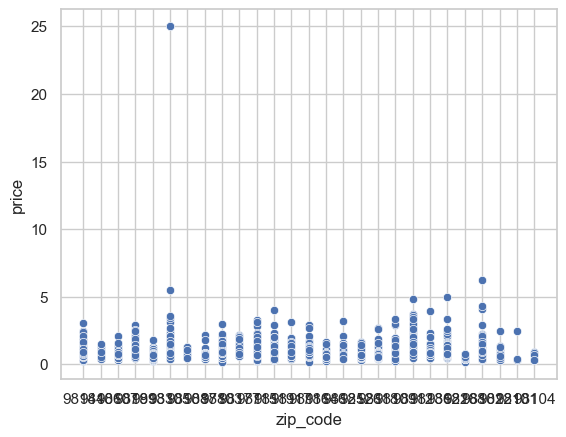

In [40]:
sns.scatterplot(y = 'price', x = 'zip_code', data = us_house)

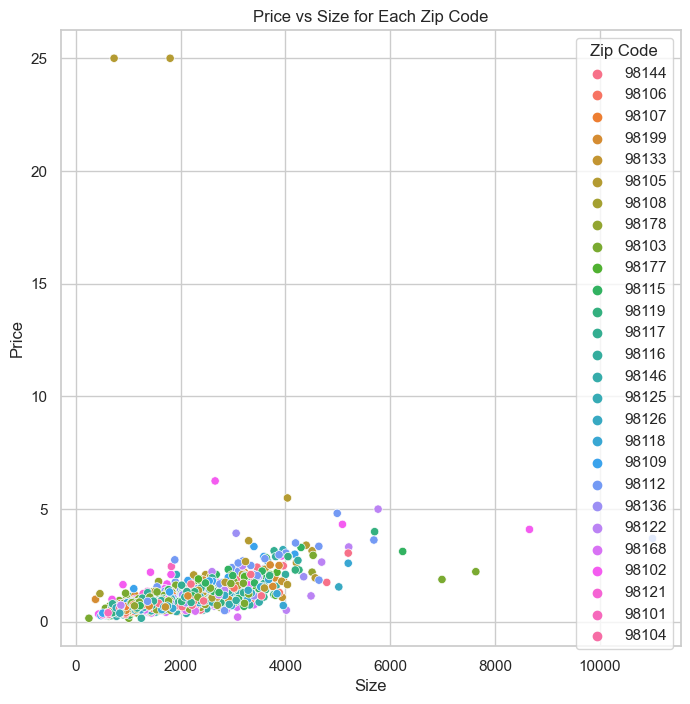

In [41]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
sns.scatterplot(data=us_house, x='size', y='price', hue='zip_code')
# Set plot title and axis labels
plt.title('Price vs Size for Each Zip Code')
plt.xlabel('Size')
plt.ylabel('Price')

# Show legend
plt.legend(title='Zip Code')

# Show the plot
plt.show()

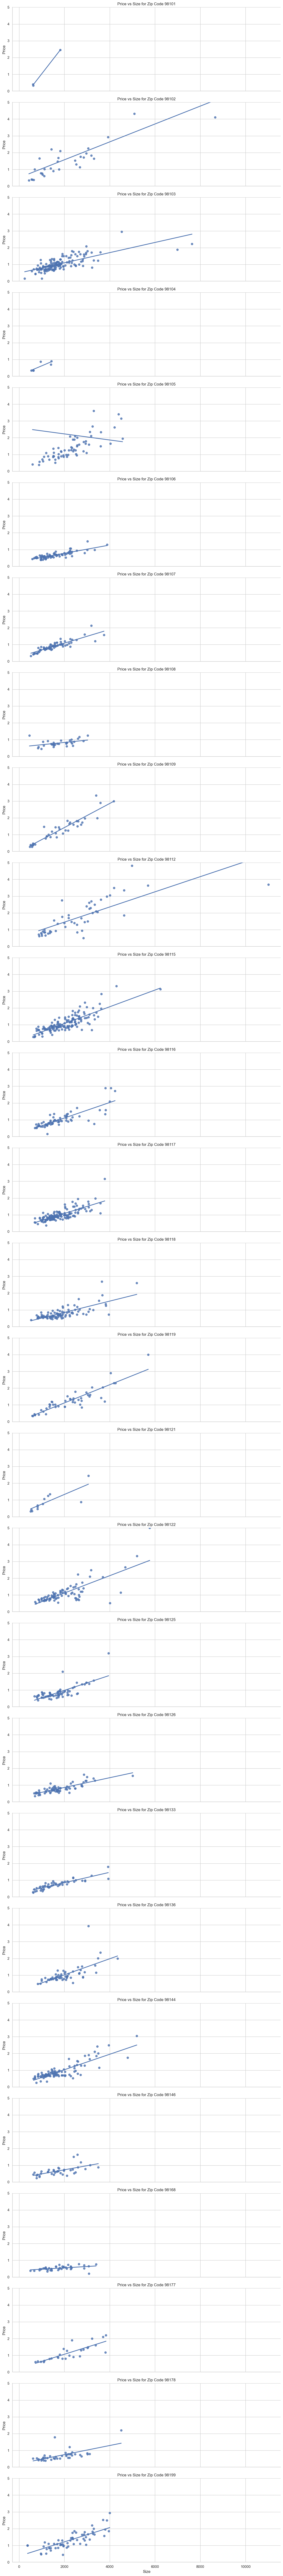

In [13]:
g = sns.FacetGrid(us_house, row='zip_code', height=4, aspect=3)
g.map(sns.regplot, 'size', 'price', ci = None)
g.set(ylim=(0, 5))
# Set titles
g.set_titles("Price vs Size for Zip Code {row_name}")
g.set_axis_labels('Size', 'Price')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### We will plot regression for each zipcode, using baths, size & bedroom

In [14]:
us_house

,beds,baths,size,lot_size,zip_code,price
0,3,2.5,2590.0,6000.0,98144,0.79500
1,4,2.0,2240.0,13503.6,98106,0.91500
2,4,3.0,2040.0,3783.0,98107,0.95000
3,4,3.0,3800.0,5175.0,98199,1.95000
5,2,2.0,1190.0,43560.0,98107,0.74000
...,...,...,...,...,...,...
2009,3,3.5,1680.0,1486.0,98126,0.67500
2010,2,2.0,1400.0,14810.4,98199,0.69995
2011,3,2.0,1370.0,21780.0,98112,0.91000
2013,4,2.0,2140.0,6250.0,98199,1.15000


In [42]:
us_house[['beds', 'size', 'price', 'lot_size']].corr()*100

,beds,size,price,lot_size
beds,100.000000,72.788081,23.395969,-6.938333
size,72.788081,100.000000,40.232364,-6.035369
price,23.395969,40.232364,100.000000,-2.908920
lot_size,-6.938333,-6.035369,-2.908920,100.000000


In [16]:
#sns.pairplot(us_house, vars = ['beds', 'size', 'price', 'lot_size'])
#plt.show()

In [17]:
#sns.scatterplot( x = 'zip_code', y ='price', data = us_house)

In [43]:
us_house = us_house[us_house['price'] < 5]

In [44]:
us_house.dtypes

beds          int64
baths       float64
size        float64
lot_size    float64
zip_code     object
price       float64
dtype: object

In [19]:
from statsmodels.formula.api import ols

In [161]:
us_house_reg = ols('price ~ zip_code:size ', data = us_house).fit()
print(us_house_reg.summary())
print('')
print('Below are coeffs: ')
print(us_house_reg.params)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     142.4
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:51:24   Log-Likelihood:                -323.35
No. Observations:                1664   AIC:                             702.7
Df Residuals:                    1636   BIC:                             854.4
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.2447 

In [56]:
test = pd.read_csv(r'C:\Users\archi\OneDrive\Desktop\Python Projects\House Prices\test.csv', parse_dates = True)

In [59]:
test = test.drop(['beds', 'baths', 'size_units', 'lot_size', 'lot_size_units'], axis = 1)

In [61]:
test['zip_code'] = test['zip_code'].astype('string')
test['zip_code'] = test['zip_code'].astype('object')
test_2 = test[['size', 'zip_code']].copy()
test_2.head()

In [81]:
'98188' in list(us_house['zip_code'].unique())

False

In [84]:
test_2 = test_2[test_2['zip_code'].isin(us_house['zip_code'].unique())]

In [157]:
pred_data = test.assign(predicted_price = us_house_reg.predict(test_2)).dropna()

In [158]:
pred_data['price'] = pred_data['price']/1000000

In [91]:
pred_data

,size,zip_code,price,predicted_price
0,2850.0,98119,1.1750,1.575433
1,3040.0,98106,1.0575,1.054145
2,1290.0,98125,0.7990,0.719248
4,1942.0,98107,1.1870,1.065111
5,963.0,98122,0.7010,0.647331
...,...,...,...,...
500,5580.0,98146,3.8000,1.598528
501,1390.0,98126,0.5750,0.670085
502,2950.0,98118,3.1050,1.146940
503,3010.0,98115,1.8070,1.532574


In [162]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(mean_absolute_percentage_error(pred_data['price'], pred_data['predicted_price']))

30.349027344486025


In [93]:
from sklearn.metrics import r2_score

In [160]:
r2_score(pred_data['price'], pred_data['predicted_price'])

-0.9580633625786048

#### Model 2 - no intercept term - Final Model

In [121]:
us_house_regg = ols('price ~ zip_code:size + baths + 0', data = us_house).fit()
print(us_house_regg.summary())
print('')
print('Below are coeffs: ')
print(us_house_regg.params)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.931
Model:                            OLS   Adj. R-squared (uncentered):              0.930
Method:                 Least Squares   F-statistic:                              786.0
Date:                Tue, 09 Apr 2024   Prob (F-statistic):                        0.00
Time:                        16:41:04   Log-Likelihood:                         -352.25
No. Observations:                1664   AIC:                                      760.5
Df Residuals:                    1636   BIC:                                      912.2
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [128]:
test = pd.read_csv(r'C:\Users\archi\OneDrive\Desktop\Python Projects\House Prices\test.csv', parse_dates = True)
test = test.drop(['beds', 'size_units', 'lot_size', 'lot_size_units'], axis = 1)
test['zip_code'] = test['zip_code'].astype('string')
test['zip_code'] = test['zip_code'].astype('object')
test_2 = test[['size', 'zip_code', 'baths']].copy()
test_2.head()
test_2 = test_2[test_2['zip_code'].isin(us_house['zip_code'].unique())]

In [129]:
pred_data = test.assign(predicted_price_2 = us_house_regg.predict(test_2)).dropna()

In [130]:
pred_data['price'] = pred_data['price']/1000000

In [140]:
pred_data

,baths,size,zip_code,price,predicted_price_2
0,3.0,2850.0,98119,1.1750,1.566532
1,5.0,3040.0,98106,1.0575,1.333305
2,1.0,1290.0,98125,0.7990,0.584848
4,3.5,1942.0,98107,1.1870,1.169599
5,2.0,963.0,98122,0.7010,0.592914
...,...,...,...,...,...
500,4.5,5580.0,98146,3.8000,1.874389
501,2.5,1390.0,98126,0.5750,0.668732
502,2.5,2950.0,98118,3.1050,1.157200
503,5.0,3010.0,98115,1.8070,1.746809


In [132]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(mean_absolute_percentage_error(pred_data['price'], pred_data['predicted_price_2']))

22.076617623202775


In [134]:
r2_score(pred_data['price'], pred_data['predicted_price_2'])*100

60.927007684901554

In [141]:
pred_data[['price', 'predicted_price_2']].corr()

,price,predicted_price_2
price,1.000000,0.781168
predicted_price_2,0.781168,1.000000


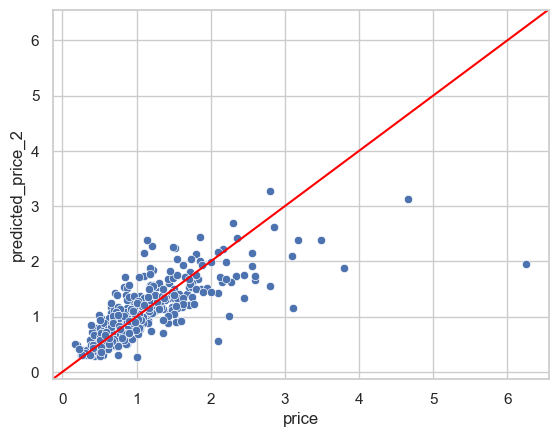

In [149]:
sns.scatterplot(x = 'price', y = 'predicted_price_2', data = pred_data)
plt.axline(xy1=(pred_data['price'].min(), pred_data['price'].min()), xy2=(pred_data['price'].max(), pred_data['price'].max()), color='red', linestyle='-', label='y = x')
plt.show()

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          2.,   1.,   2.,   1.,   3.,   2.,   4.,   9.,  12.,  21.,  28.,
         66., 130., 238., 338., 304., 211., 122.,  65.,  36.,  19.,   7.,
         18.,   5.,   4.,   5.,   3.,   1.,   1.,   1.,   1.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.]),
 array([-2.53427385, -2.43592382, -2.3375738 , -2.23922377, -2.14087375,
        -2.04252372, -1.9441737 , -1.84582367, -1.74747365, -1.64912362,
        -1.5507736 , -1.45242357, -1.35407355, -1.25572353, -1.1573735 ,
        -1.05902348, -0.96067345, -0.86232343, -0.7639734 , -0.66562338,
        -0.56727335, -0.46892333, -0.3705733 , -0.27222328, -0.17387325,
        -0.07552323,  0.0228268 ,  0.12117682,  0.21952685,  0.31787687,
         0.4162269 ,  0.51457692,  0.61292695,  0.71127697,  0.809627  ,
         0.90797702,  1.00632704,  1.10467707,  1.20302709,  1.30137712,
         1.39972714,  1.49807717,  1.59642719,  1.69477722,  1.79312724,
 

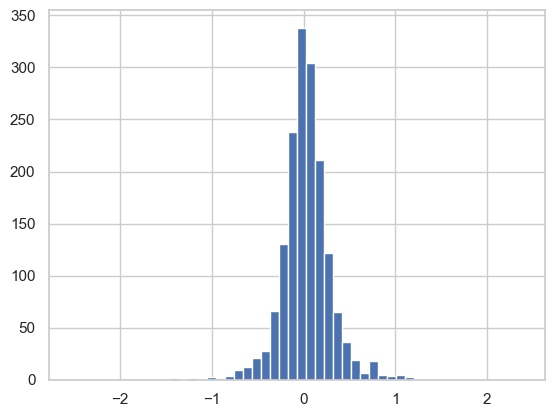

In [155]:
plt.hist(us_house_regg.resid, bins = 50)